# Import necessary modules

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import cv2

# Define a function for displaying images

In [ ]:
def display_imgs(img_set, title_set = '', row = 1, col = 1):
  n = len(img_set)
  plt.figure(figsize = (20, 20))
  for i in range(n):
    plt.subplot(row, col, i+1)
    if (title_set != ''):
      plt.title(title_set[i])
    if (len(img_set[i].shape) == 2):
      plt.imshow(img_set[i], cmap = 'gray')
    else:
      plt.imshow(img_set[i])
    plt.axis('off')
  plt.show()
  plt.close()

# Load an image

(826, 807, 3)
(826, 807)


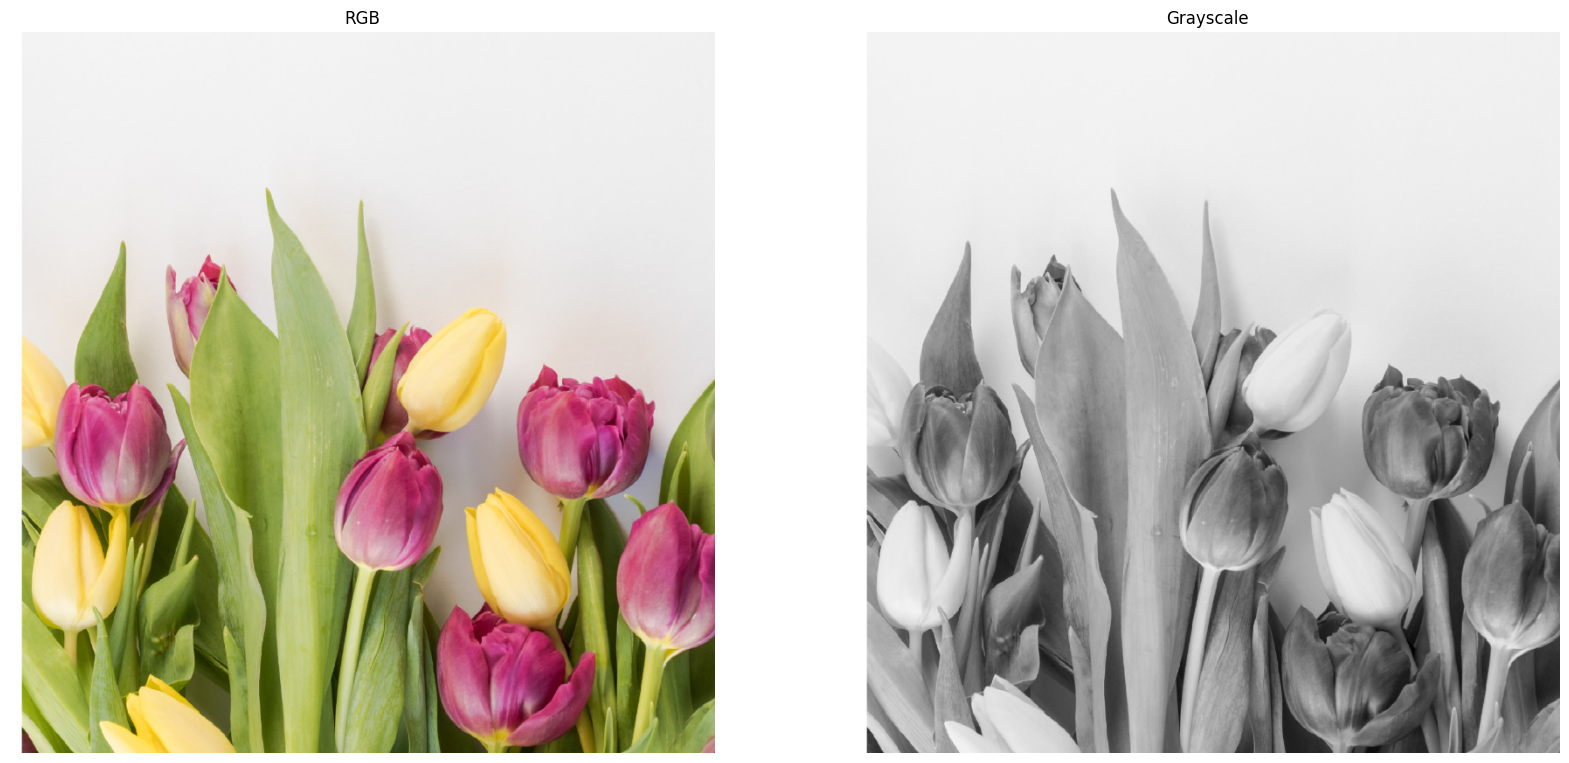

In [ ]:
# Load an image from the Goggle Drive
img_path = '/content/Tulip.jpg' # This is a temporary path.
                                # Upload an mage file into /content folder every time
                                # after starting colab
rgb_img = plt.imread(img_path)
print(rgb_img.shape)

# Turn RGB image into a grayscale image
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
print(gray_img.shape)

# Display loaded image
img_set = [rgb_img, gray_img]
title_set = ['RGB', 'Grayscale']
display_imgs(img_set, title_set, row = 1, col = 2)


# Define some kernels/filters

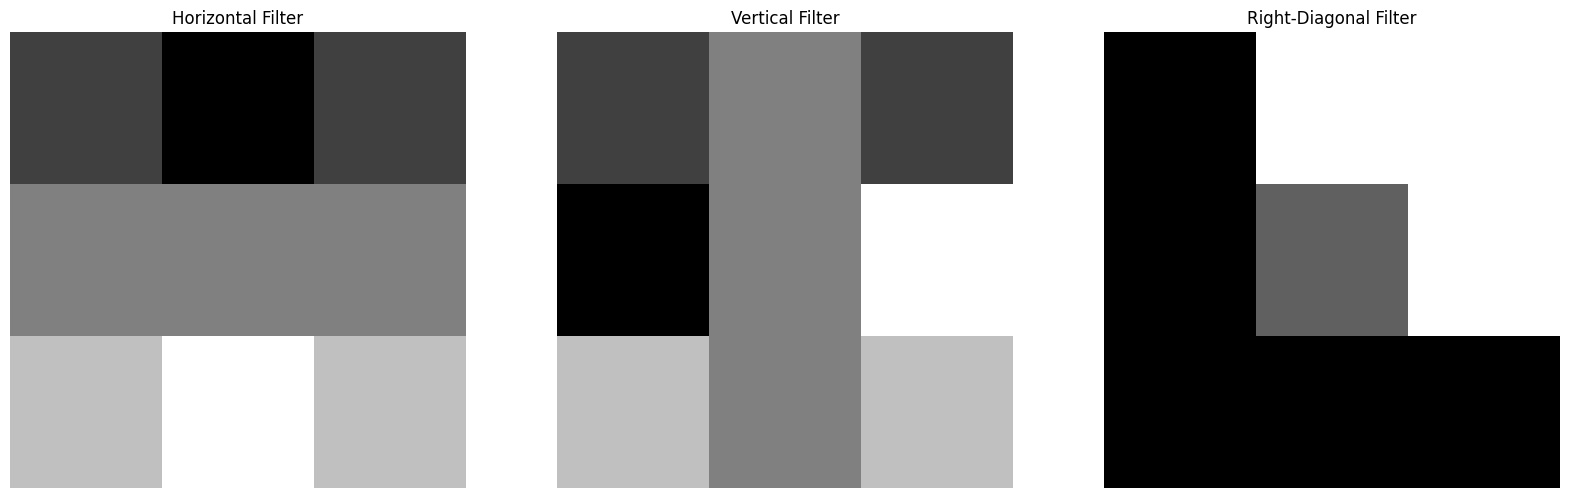

In [ ]:
# Define 2D kernels
vertical_edge_kernel2D = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).astype(np.int8)
horizontal_edge_kernel2D = np.array([[-1, 0, -1], [-2, 0, 2], [1, 0, 1]]).astype(np.int8)
right_diagonal_edge_kernel2D = np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]).astype(np.int8)

# Display kernels
kernel_set2D = [vertical_edge_kernel2D, horizontal_edge_kernel2D, right_diagonal_edge_kernel2D]
title_set = ['Horizontal Filter', 'Vertical Filter', 'Right-Diagonal Filter']
display_imgs(kernel_set2D, title_set, row = 1, col = 3)

# Perform convolution

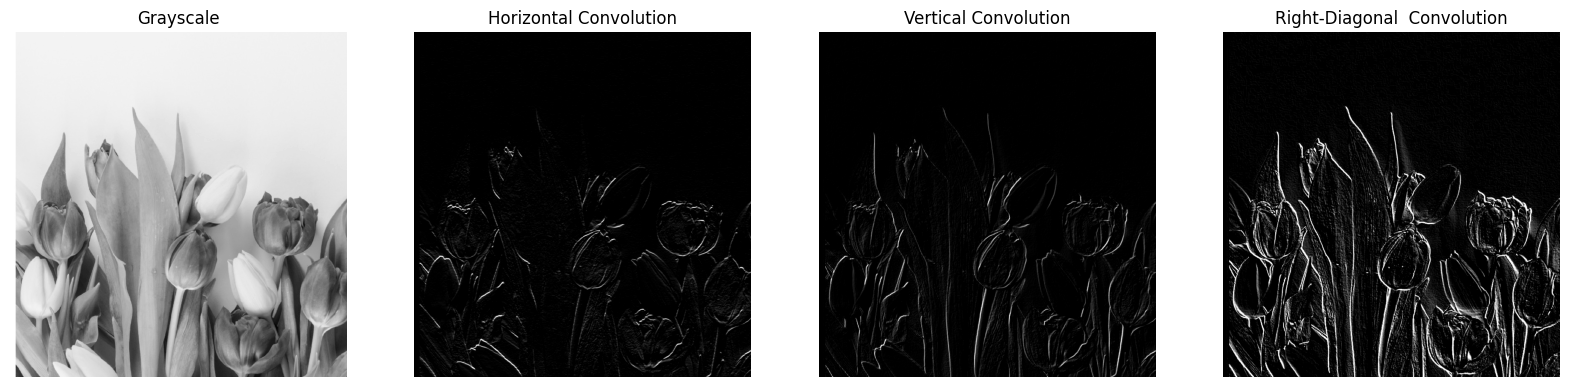

In [ ]:
# Convolution
conv_img_set = [gray_img]
n = len(kernel_set2D)
for i in range(n):
  conv_img = cv2.filter2D(gray_img, ddepth = -1, kernel = kernel_set2D[i])
  conv_img_set.append(conv_img)

# Display convolved image
title_set = ['Grayscale', 'Horizontal Convolution', 'Vertical Convolution', 'Right-Diagonal  Convolution']
display_imgs(conv_img_set, title_set, row = 1, col = 4)

# Load pretrained VGG16 without fully-connected layers

In [ ]:
vgg16 = VGG16(weights = 'imagenet', include_top = False)
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

# First convolutional layer of first Conv-Block of VGG16 uses 64 kernels. Check what different kernels help the pretrained VGG16 to see.

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 238ms/step


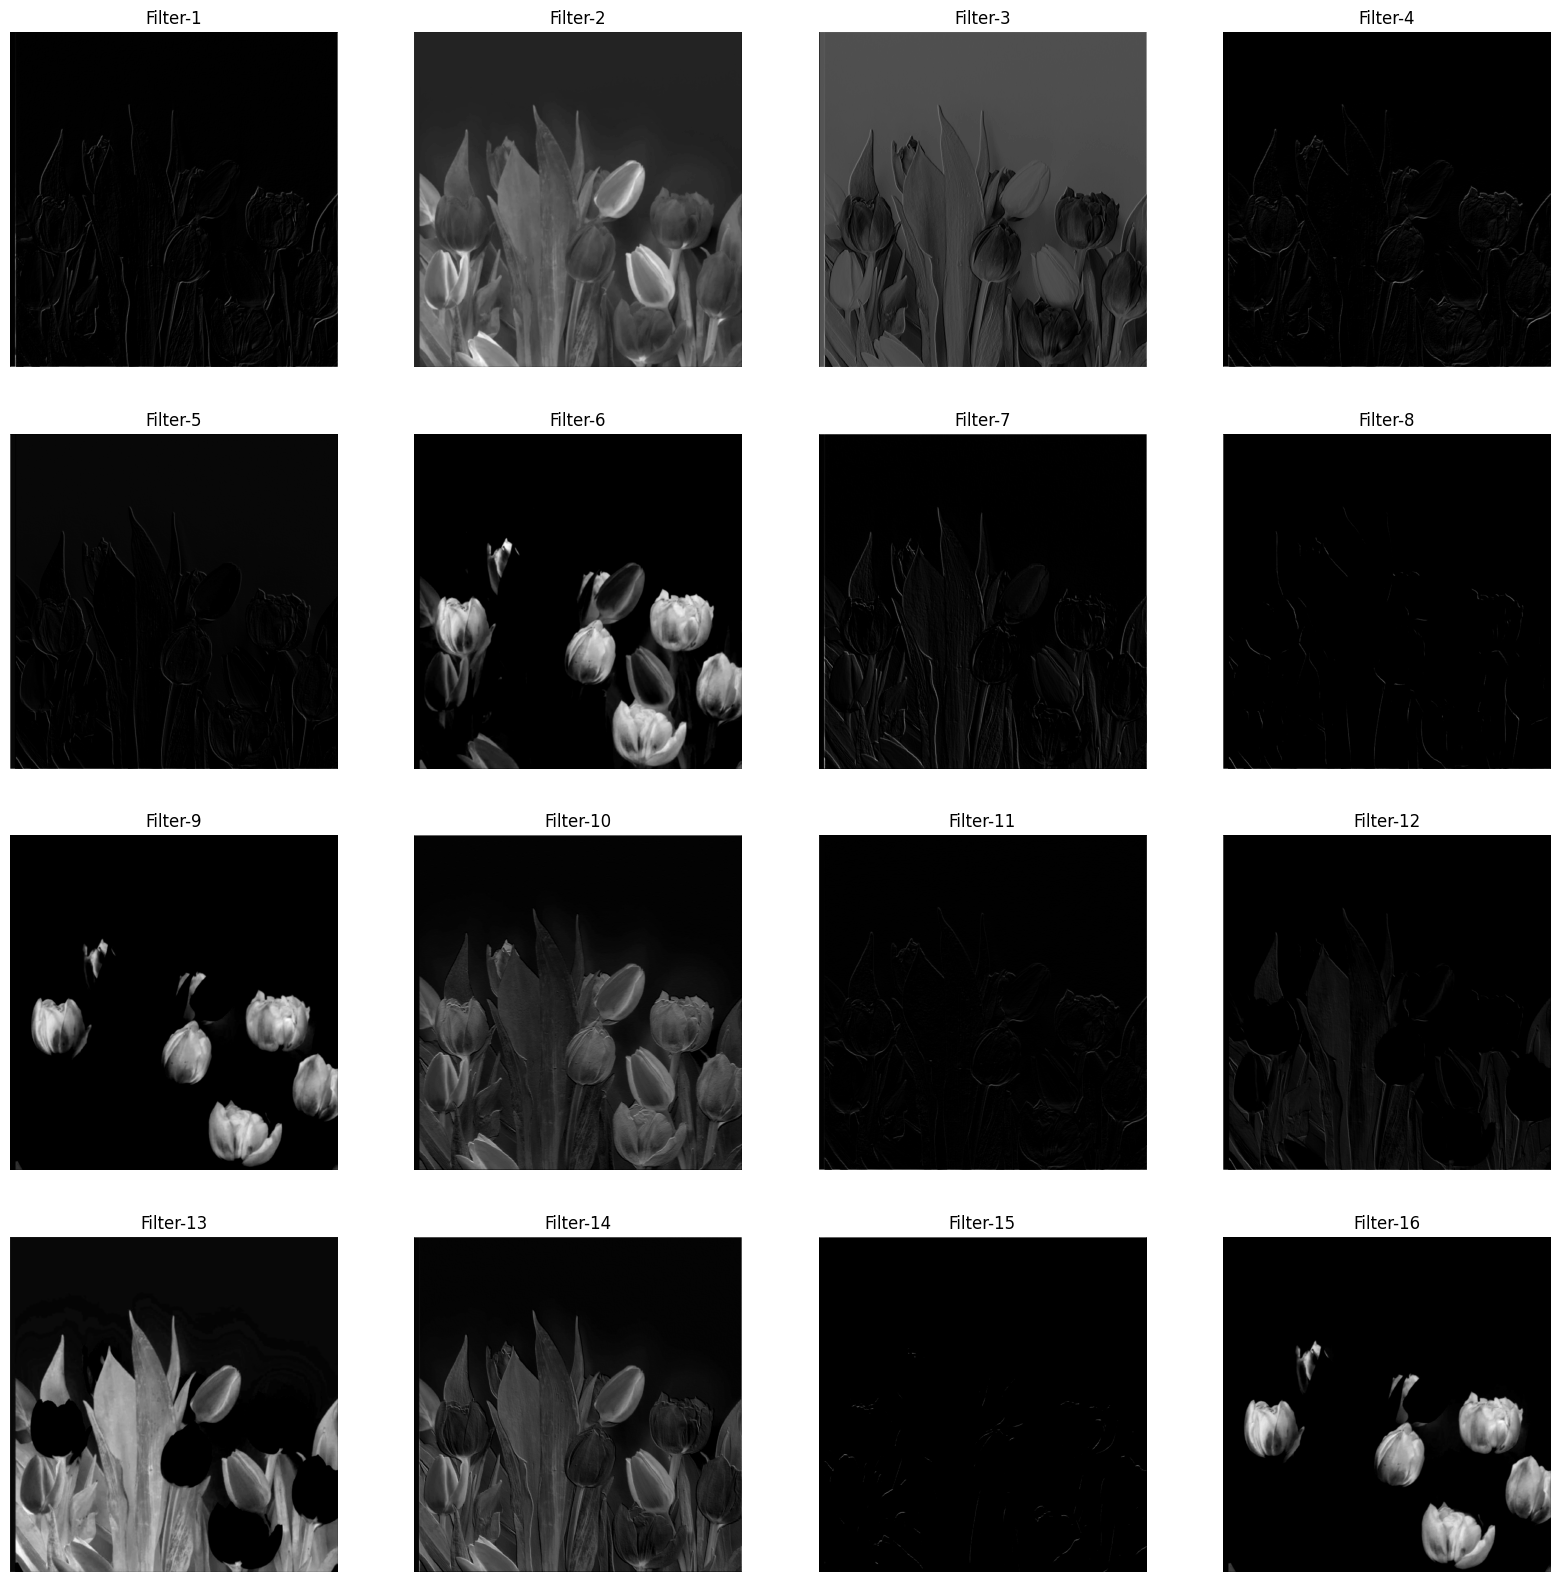

In [ ]:
# Build a dummy model with layers until the 1st convolutional layer of 1st Conv-Block
model = Model(vgg16.inputs, vgg16.get_layer('block1_conv1').output)
model.summary()

# Turn 3D RGB image 4D data to fulfill the requirements of keras' convolutional layers
img3D = np.expand_dims(rgb_img, axis = 0)

# Predict the output of the dummy model
internal_img = model.predict(img3D)

# Display what dummy model sees
img_set = []
title_set = []
for i in range(16):
  title_set.append('Filter-' + str(i+1))
  img_set.append(internal_img[0, :, :, i])
display_imgs(img_set, title_set, row = 4, col = 4)

# We will see that not all filters extract useful information

# Second convolutional layer of second Conv-Block of VGG16 uses 128 kernels. Check what different kernels help the pretrained VGG16 to see.

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
Total params: 260160 (1016.25 KB)
Trainable params: 260160

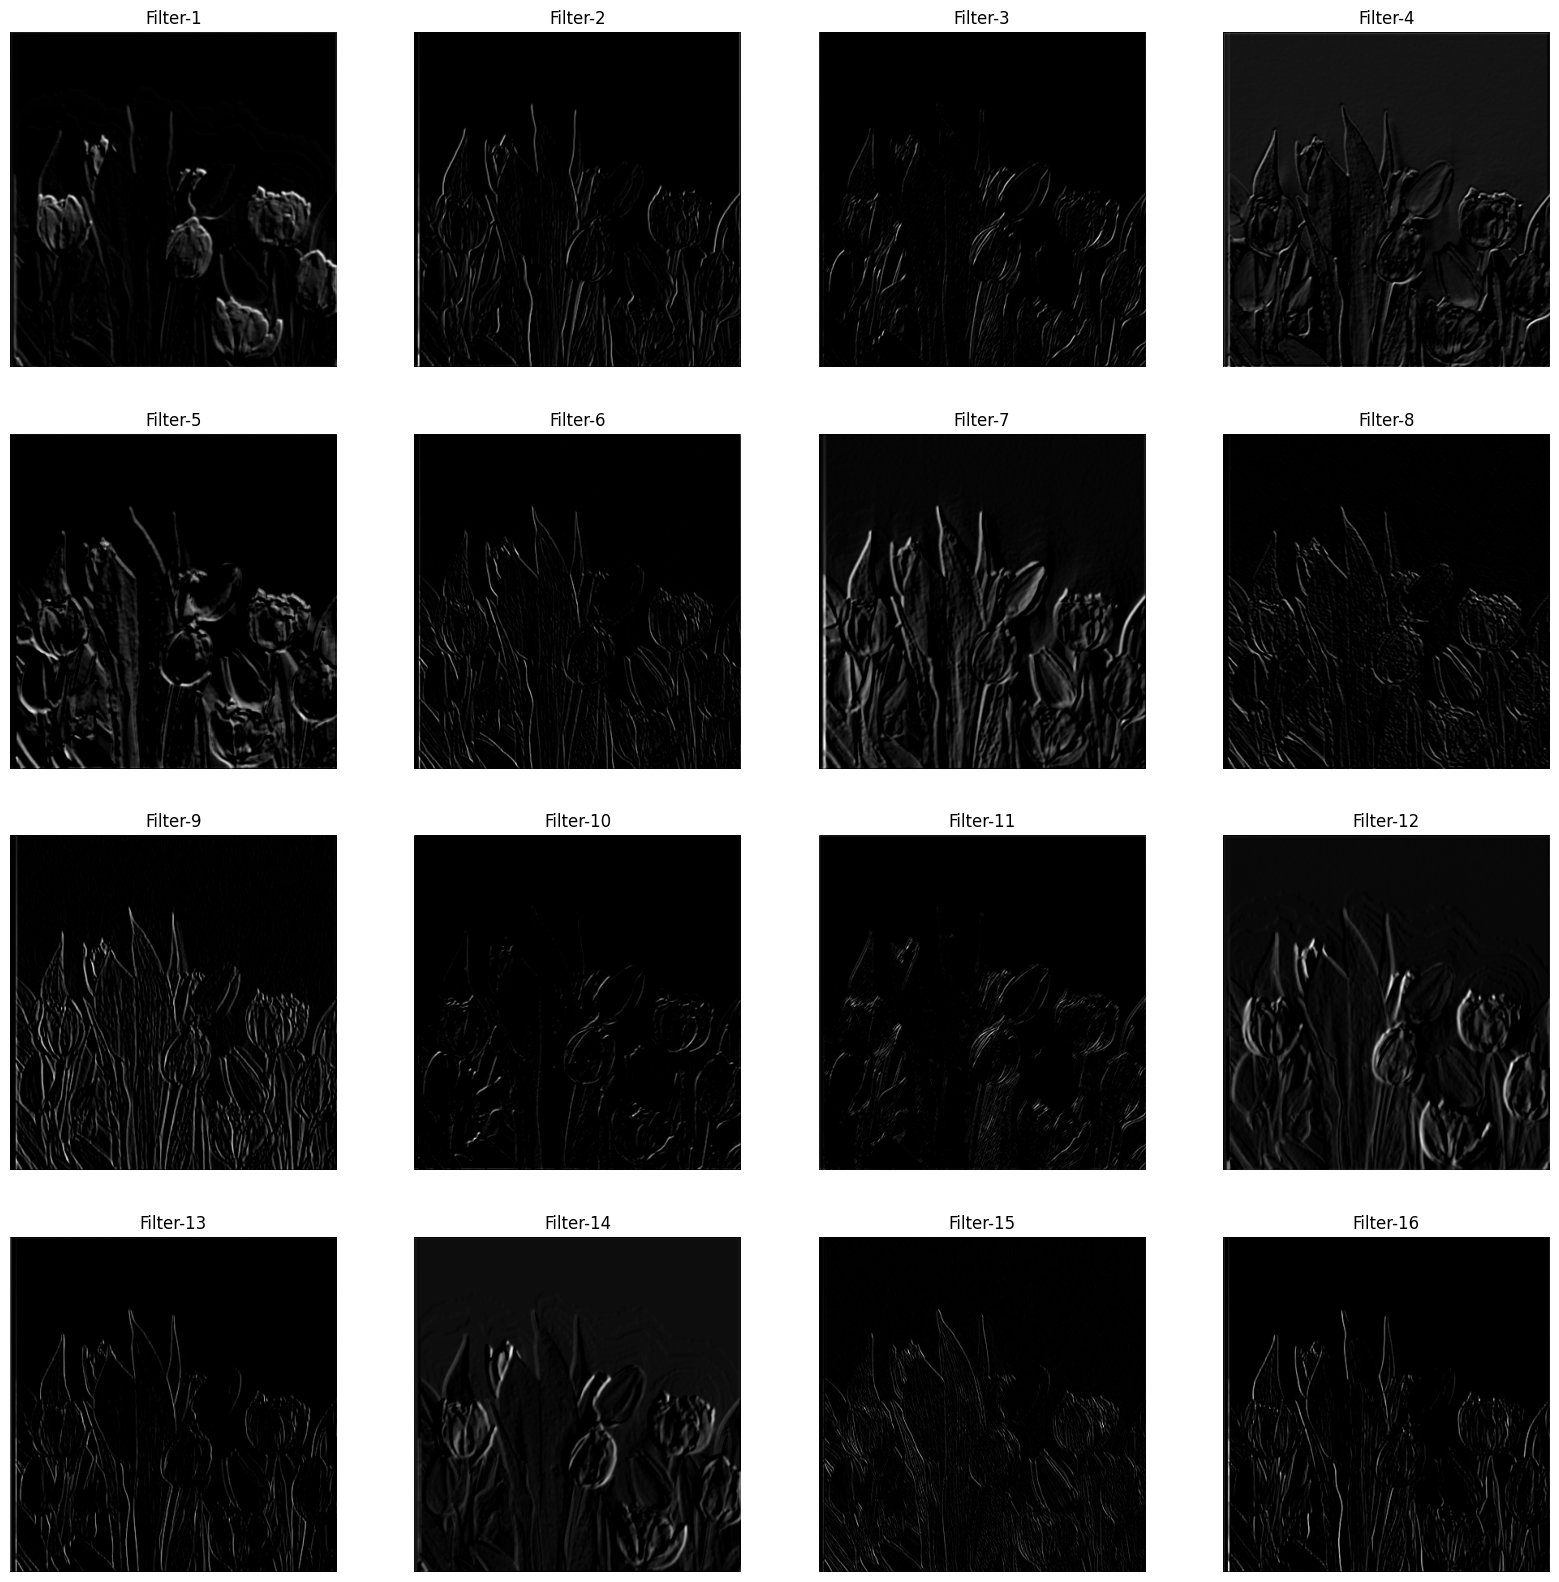

In [ ]:
# Build a dummy model with layers until the 2nd convolutional layer of 2nd Conv-Block
model = Model(vgg16.inputs, vgg16.get_layer('block2_conv2').output)
model.summary()

# Turn 3D RGB image 4D data to fulfill the requirements of keras' convolutional layers
img3D = np.expand_dims(rgb_img, axis = 0)

# Predict the output of the dummy model
internal_img = model.predict(img3D)

# Display what dummy model sees
img_set = []
title_set = []
for i in range(16):
  title_set.append('Filter-' + str(i+1))
  img_set.append(internal_img[0, :, :, i])
display_imgs(img_set, title_set, row = 4, col = 4)

# Check what pretrained VGG16 sees in the last Convolutional layer of different Conv-Block

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
Total params: 38720 (151.25 KB)
Trainable params: 38720 (151.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 1s 1s/step
Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                  

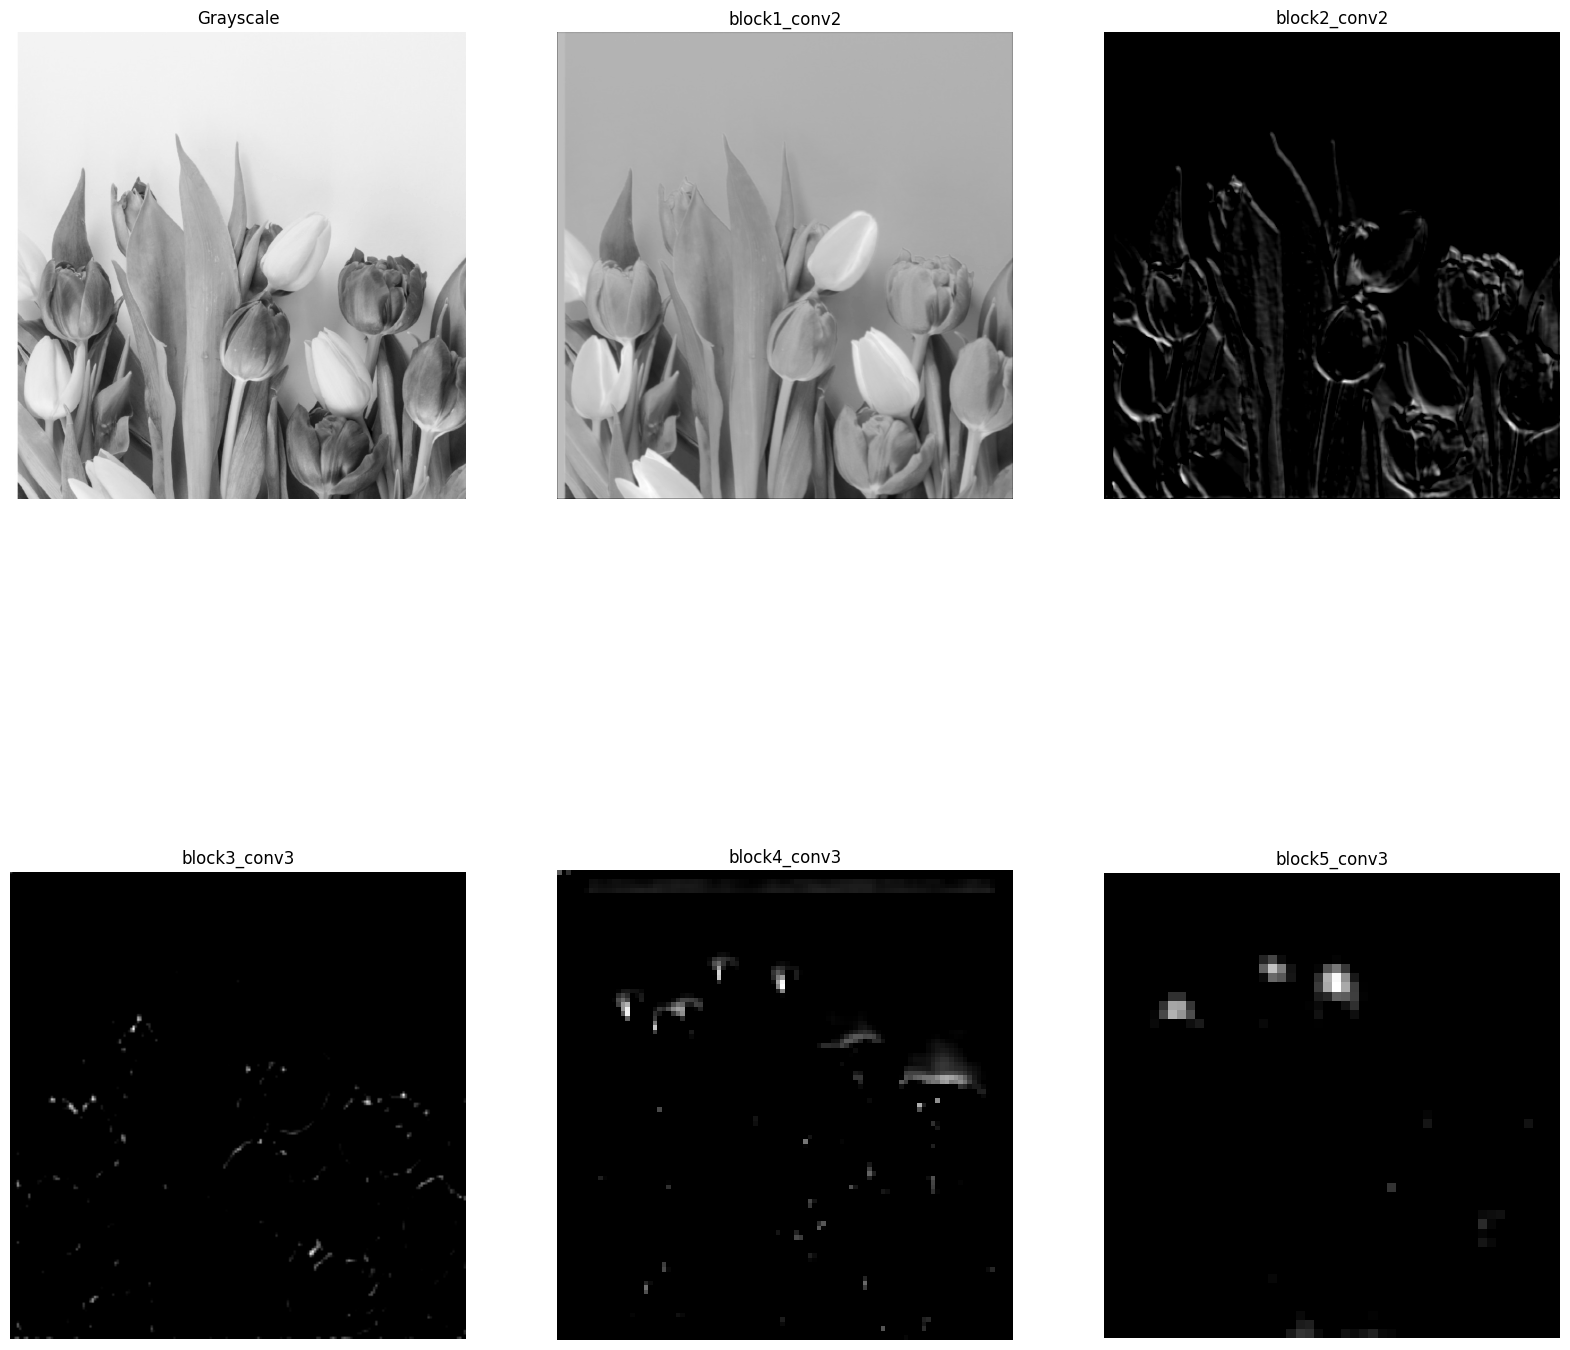

In [ ]:

# Make a list of convolutional layers whose output we want to see.
conv_layer_list = ['block1_conv2', 'block2_conv2', 'block3_conv3', 'block4_conv3', 'block5_conv3']
n = len(conv_layer_list)

# Turn 3D RGB image 4D data to fulfill the requirements of keras' convolutional layers
img3D = np.expand_dims(rgb_img, axis = 0)

# Extract what VGG16 sees
img_set = [rgb_img]
title_set = ['RGB']
for i in range(n):
  # Build a dummy model with layers until the 2nd convolutional layer of 2nd Conv-Block
  model = Model(vgg16.inputs, vgg16.get_layer(conv_layer_list[i]).output)
  model.summary()

  # Predict the output of the dummy model
  internal_img = model.predict(img3D)

  # Prepare img_set and title_set
  img_set.append(internal_img[0, :, :, 4])
  title_set.append(conv_layer_list[i])

# Display what VGG16 sees in different layer convolved by Filter-5
display_imgs(img_set, title_set, row = 2, col = 3)

# We will see that shallower layer learned human-understandable features when deeper layer learned
# class-representative features which are not understandable by humen.